<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/python-code-for-FinancialAnalysis-book/blob/master/2020_6_5_chap8_sample_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Jun-20-2020
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd
from google.colab import files

In [ ]:
class Combination:
  
  def __init__ (self, population):
    
    self.__population = population
    self.__combine = []
    self.__mean_result = []
    self.__counts=[]

  def comb_result(self,size):

    self.__combine = combinations(self.__population,int(size)) #Give the result of combination of population
    result = list(self.__combine)
    self.__mean_result = np.mean(result,axis=1)#calculate the mean of each combination
    dict_data = {'Combination':result,'Mean':self.__mean_result.T}
    frame_data = pd.DataFrame(dict_data)
    return frame_data

  def sample_dist_result(self):

    values, self.__counts = np.unique(self.__mean_result, return_counts=True) #count the unique mean
    self.__counts = np.divide(self.__counts,sum(self.__counts))
    formattedList = ['{:.2%}'.format(member) for member in self.__counts]
    dict_data = {'Sampling distribution':values,'Probability':formattedList}
    frame_data = pd.DataFrame(dict_data)
    return frame_data

  def Plot_hist(self):

    plt.figure(figsize=(10,5))
    plt.hist(self.__mean_result,bins=len(self.__counts),rwidth=0.5,density=True)# plot the density histogram
    plt.suptitle('Sample Distribution',fontsize=16) 
    plt.title('Sample mean = {:.2f}, Population mean = {:.2f}'.format(np.mean(self.__population),np.mean(self.__population)))
    plt.xlabel('Mean')
    plt.ylabel('Probability')

In [ ]:
#request user input
population = input("Enter a list numbers separated by space. Default '1 2 3 4 5 6'-->") or '1 2 3 4 5 6'
population = population.split()
population = [int(i) for i in population] #str to int
size = input('Number of values in each sample? Default is 3 -->') or 3 

Enter a list numbers separated by space. Default '1 2 3 4 5 6'-->1 2 3 30 40 50 45 56 67 98 34 65 67 98 34 65 67 34 78 56 98 67 43 45
Number of values in each sample? Default is 3 -->5


In [ ]:
#print list of combinations
First = Combination(population)
frame_data = First.comb_result(size)
print(frame_data)

                Combination  Mean
0         (1, 2, 3, 30, 40)  15.2
1         (1, 2, 3, 30, 50)  17.2
2         (1, 2, 3, 30, 45)  16.2
3         (1, 2, 3, 30, 56)  18.4
4         (1, 2, 3, 30, 67)  20.6
...                     ...   ...
42499  (78, 56, 98, 67, 45)  68.8
42500  (78, 56, 98, 43, 45)  64.0
42501  (78, 56, 67, 43, 45)  57.8
42502  (78, 98, 67, 43, 45)  66.2
42503  (56, 98, 67, 43, 45)  61.8

[42504 rows x 2 columns]


In [ ]:
#Save combination list to your download folder
frame_data.to_csv('Combination.csv') 
files.download('Combination.csv')
print("Finish saving combination list to your download folder")

Finish saving combination list to your download folder


In [ ]:
#print sample distribution
frame_data = First.sample_dist_result()
print(frame_data)

     Sampling distribution Probability
0                     14.0       0.01%
1                     14.8       0.01%
2                     15.2       0.00%
3                     15.8       0.00%
4                     16.0       0.01%
..                     ...         ...
317                   84.8       0.00%
318                   85.2       0.02%
319                   85.6       0.02%
320                   87.4       0.00%
321                   87.8       0.01%

[322 rows x 2 columns]


In [ ]:
#Save probablity distribution to computer download folder
frame_data.to_csv('Sample_dist.csv') 
files.download('Sample_dist.csv')
print("Finish saving probablity list to computer 'Download' folder")

Finish saving probablity list to computer 'Download' folder


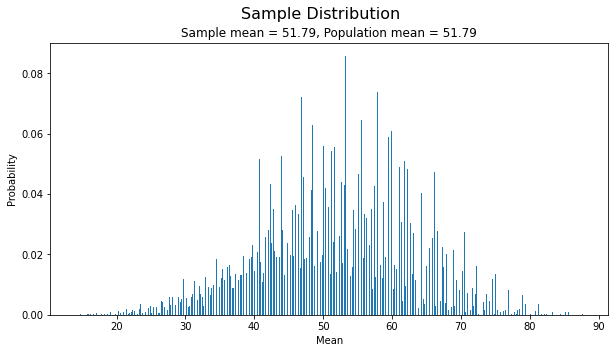

In [ ]:
#graph sample distribution
First.Plot_hist()